<a href="https://colab.research.google.com/github/Aliya03-arch/PSD/blob/main/Data_Prepocessing_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understading


In [1]:
import pandas as pd

# Baca dataset
df = pd.read_excel("data_iris.xlsx")

print("Shape:", df.shape)
display(df.head())
df.info()
display(df.describe())

# Encode kolom kategori jika ada
from sklearn.preprocessing import LabelEncoder
if 'Class' in df.columns:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

# Identifikasi outlier per fitur numerik pakai IQR
# Exclude 'Class' from numerical features for IQR outlier detection
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features_iqr = [col for col in numerical_features if col != 'Class']


def detect_outlier_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature + '_outlier'] = ((df[feature] < lower) | (df[feature] > upper)).astype(int)

for col in numerical_features_iqr:
    detect_outlier_iqr(df, col)

display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data_iris.xlsx'

# Data Prepocessing

In [8]:
# Install Python 3.11
!sudo apt-get update
!sudo apt-get install python3.11 python3.11-distutils -y

# Set python3 default ke versi 3.11
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 1

# Upgrade pip
!python3 -m ensurepip --upgrade
!python3 -m pip install --upgrade pip

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,291 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (

In [9]:
!pip install pycaret

In [10]:
import pandas as pd
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.preprocessing import LabelEncoder

# =========================
# Data Preparation
# =========================

# Baca dataset
df = pd.read_excel("data_iris.xlsx")

# Encode kolom kategori jika ada
if 'Class' in df.columns:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

# Ambil hanya fitur numerik
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numerical_features]

# =========================
# Fungsi deteksi outlier PyOD
# =========================
def detect_outlier_pyod(X, model_class, contamination=0.1):
    model = model_class(contamination=contamination)
    model.fit(X)
    labels = model.labels_        # 0 = normal, 1 = outlier
    scores = model.decision_scores_  # skor anomali
    return labels, scores

# --- ABOD ---
abod_labels, abod_scores = detect_outlier_pyod(X, ABOD)
df['abod_label'] = abod_labels
df['abod_score'] = abod_scores
abod_normal = df[df['abod_label'] == 0]
abod_outlier = df[df['abod_label'] == 1]
print("\nABOD Outlier Count:", len(abod_outlier))

# --- KNN ---
knn_labels, knn_scores = detect_outlier_pyod(X, KNN)
df['knn_label'] = knn_labels
df['knn_score'] = knn_scores
knn_normal = df[df['knn_label'] == 0]
knn_outlier = df[df['knn_label'] == 1]
print("KNN Outlier Count:", len(knn_outlier))

# --- LOF ---
lof_labels, lof_scores = detect_outlier_pyod(X, LOF)
df['lof_label'] = lof_labels
df['lof_score'] = lof_scores
lof_normal = df[df['lof_label'] == 0]
lof_outlier = df[df['lof_label'] == 1]
print("LOF Outlier Count:", len(lof_outlier))

# =========================
# Tampilkan hasil
# =========================
display(df.head())


ABOD Outlier Count: 15
KNN Outlier Count: 15
LOF Outlier Count: 15


,id,Class,sepal length,sepal width,petal length,petal width,abod_label,abod_score,knn_label,knn_score,lof_label,lof_score
0,1,0,5.1,3.5,1.4,0.2,1,-0.010918,1,5.037857,1,1.256153
1,2,0,4.9,3.0,1.4,0.2,0,-0.105879,1,4.146082,1,1.217657
2,3,0,4.7,3.2,1.3,0.2,0,-0.160850,0,3.190611,1,1.183005
3,4,0,4.6,3.1,1.5,0.2,0,-0.108965,0,3.018278,1,1.153191
4,5,0,5.0,3.6,1.4,0.2,0,-0.103372,0,3.008322,1,1.126259


# Visualisasi

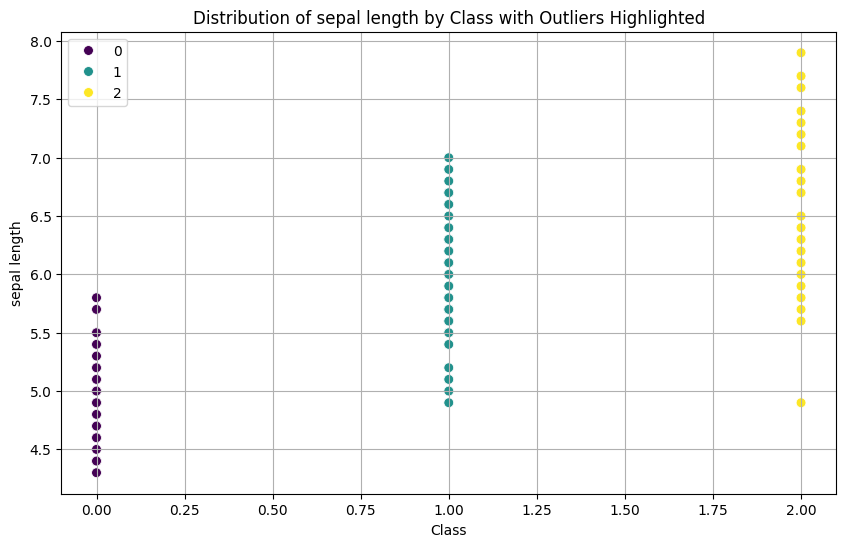

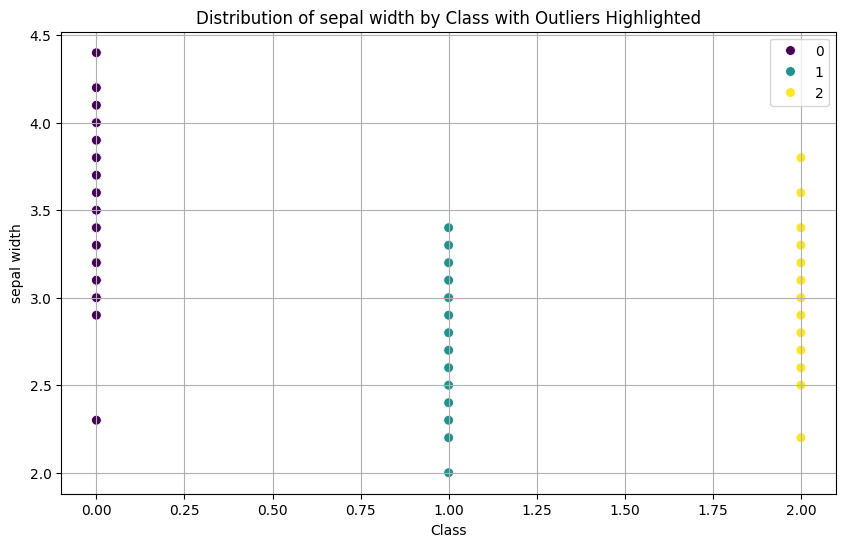

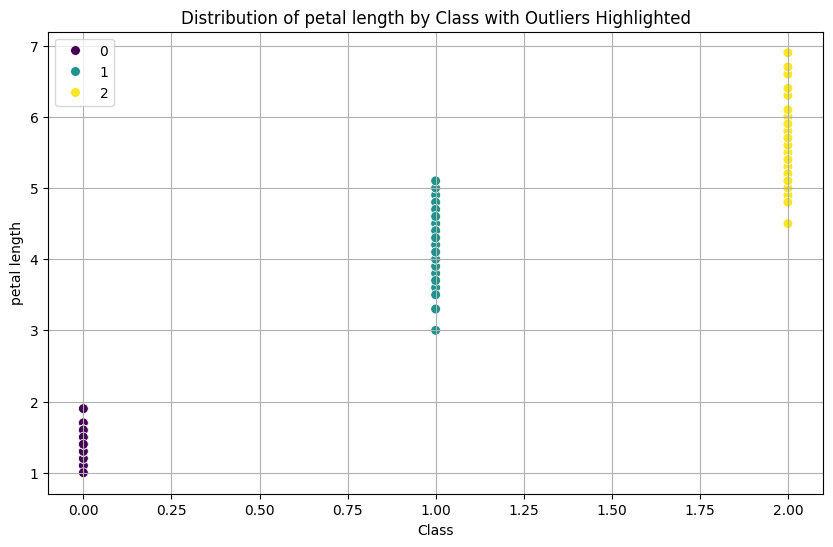

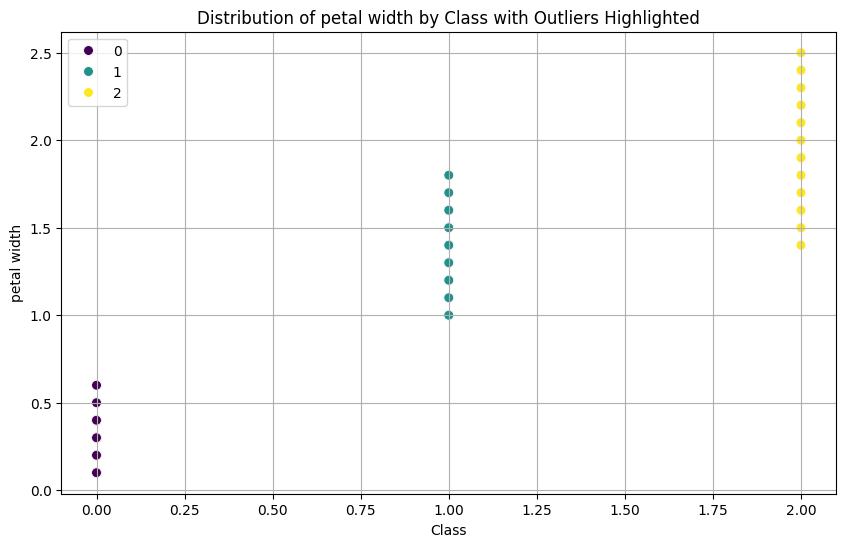

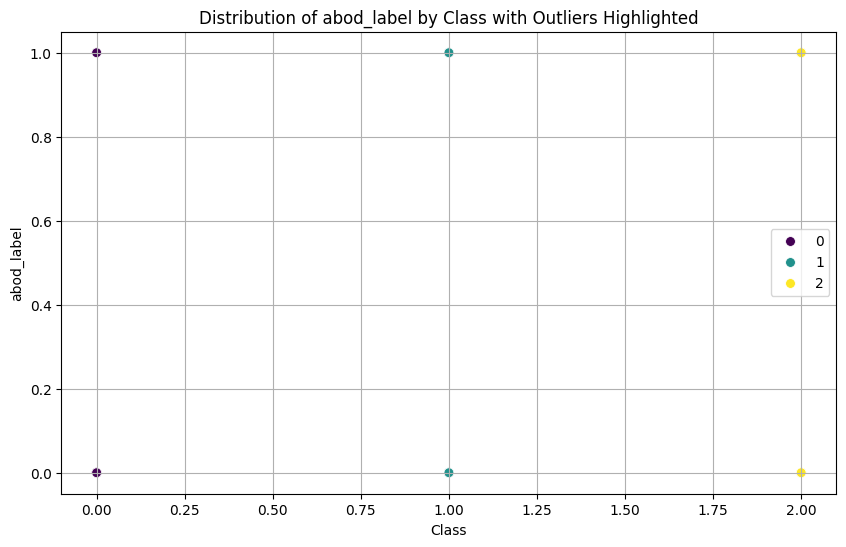

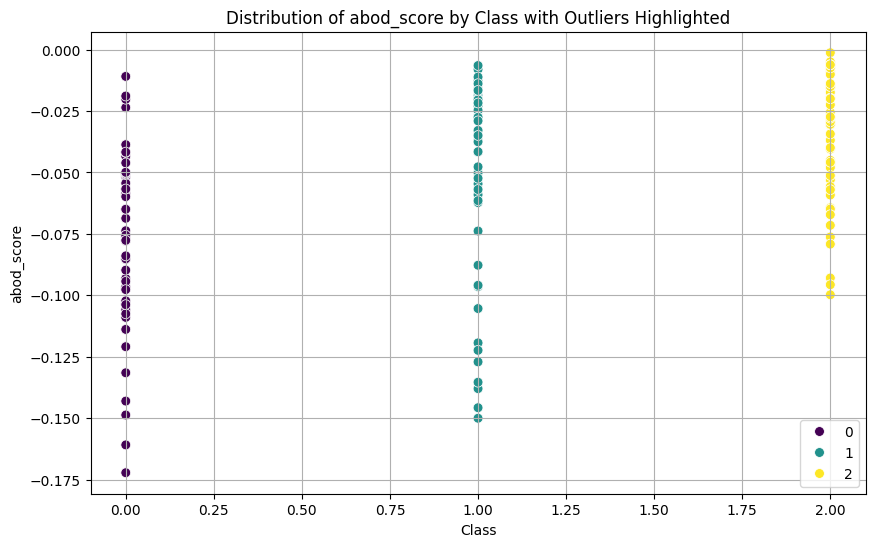

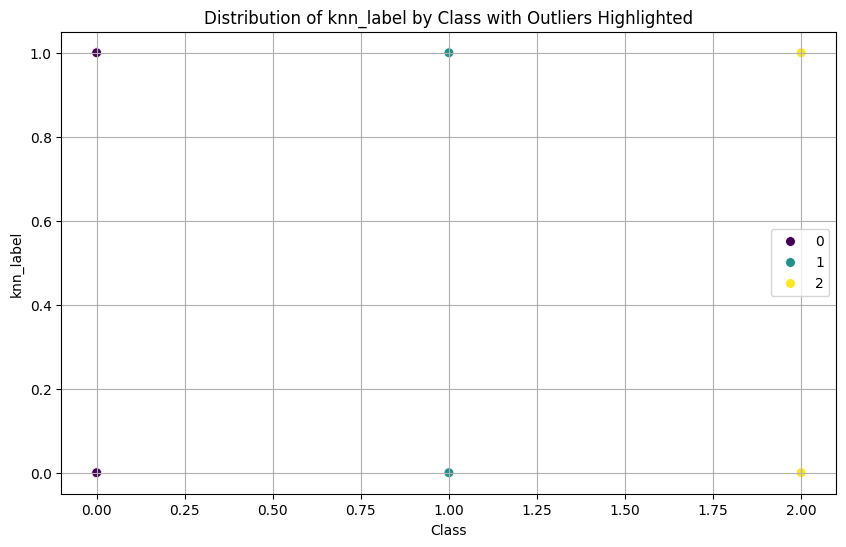

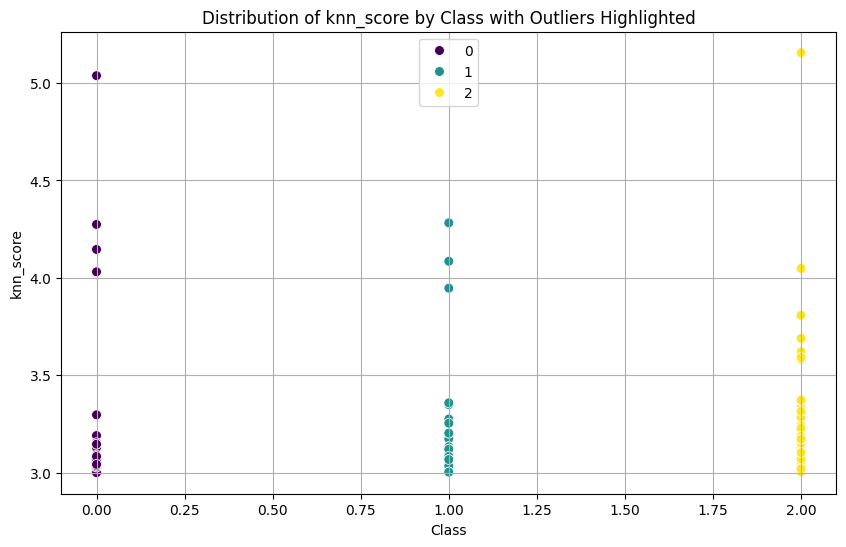

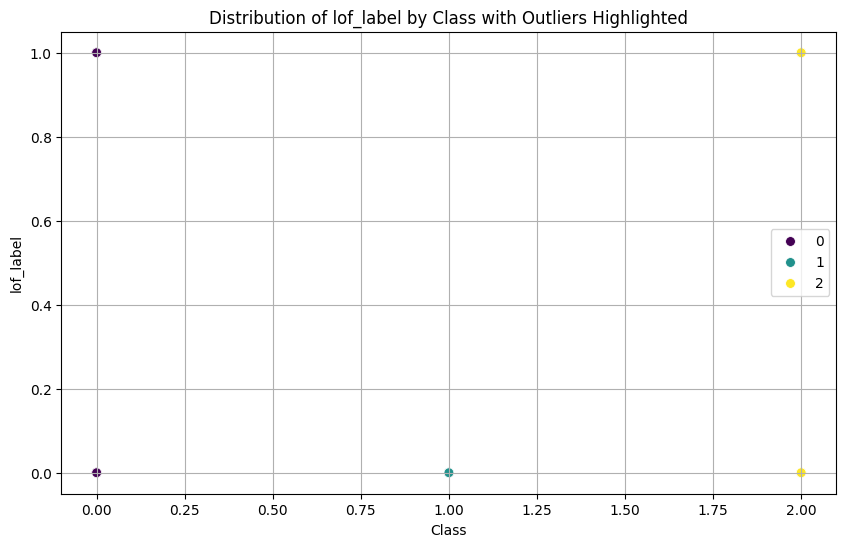

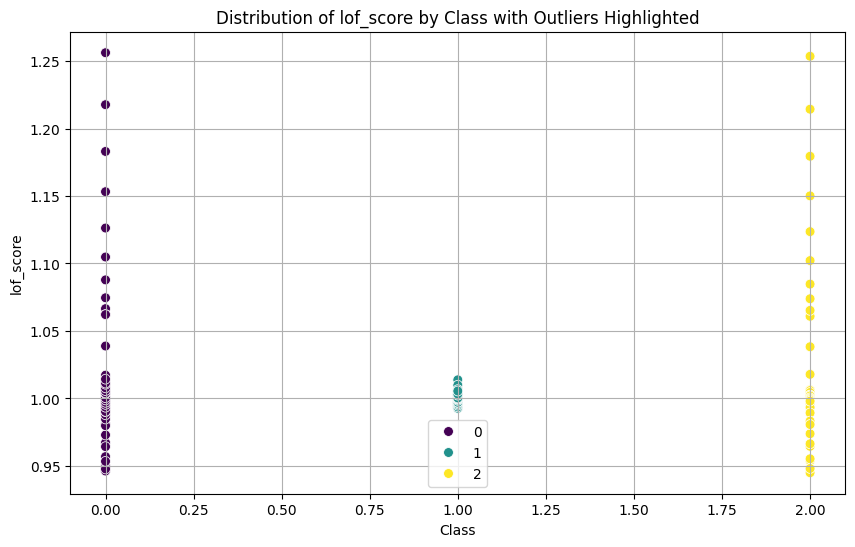

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Outlier dengan Matplotlib
# Use the original numerical features list for visualization
numerical_features_for_viz = df.select_dtypes(include=['float64', 'int64', 'object']).columns.tolist()
# Remove 'id' and outlier columns from numerical features for visualization
numerical_features_for_viz = [col for col in numerical_features_for_viz if '_outlier' not in col and col != 'id' and col != 'Class']


for feature in numerical_features_for_viz:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Class', y=feature, hue='Class', palette='viridis', s=50)

    # Highlight outliers based on IQR detection
    # Ensure the outlier column exists before trying to plot
    if feature + '_outlier' in df.columns:
        outliers_iqr = df[df[feature + '_outlier'] == 1]
        plt.scatter(outliers_iqr['Class'], outliers_iqr[feature], color='red', label='IQR Outlier', s=100, facecolors='none', edgecolors='red')

    # You can add other outlier detection results here if needed, e.g., for ABOD, KNN, LOF
    # For simplicity, let's add ABOD outliers as an example
    # outliers_abod = df[df['abod_label'] == 1]
    # plt.scatter(outliers_abod['Class'], outliers_abod[feature], color='blue', label='ABOD Outlier', s=100, facecolors='none', edgecolors='blue', marker='X')


    plt.title(f'Distribution of {feature} by Class with Outliers Highlighted')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()